<a href="https://colab.research.google.com/github/DJS-INFOMATRIX/Machine-Learning/blob/main/GooglePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory for understanding time series models

Very useful playlist : https://youtube.com/playlist?list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP&si=g5XMqXlWrgm1sWlY

Stationarity is when the value keeps flucuating but the mean remains some what constant and the variance in the graph is constant. Such a time series graph is said to follow stationarity. Also a graph which follows stationarity shouldn't have any seasonality (i.e. there should be no repeating trends in the graph). The graph below is said to follow stationarity since the mean remains the same throughout and also the vairiance is mostly except one or two points of time.

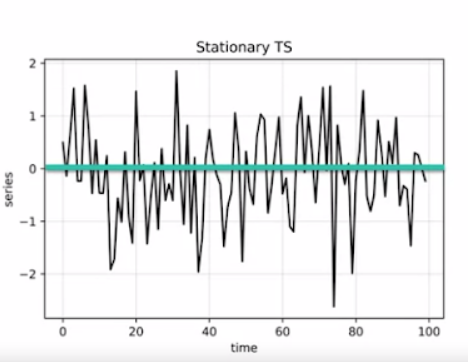

But, the graph below cannot be said to follow stationarity since there is a repeating pattern over and over. Thus, it is said to follow seasonality.
A graph is said to follow seasonality if the mean and variance are not constant or there is a repeating pattern in the graphs.

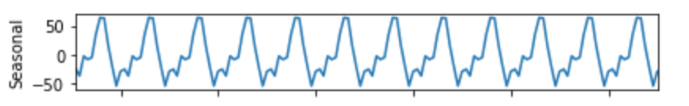

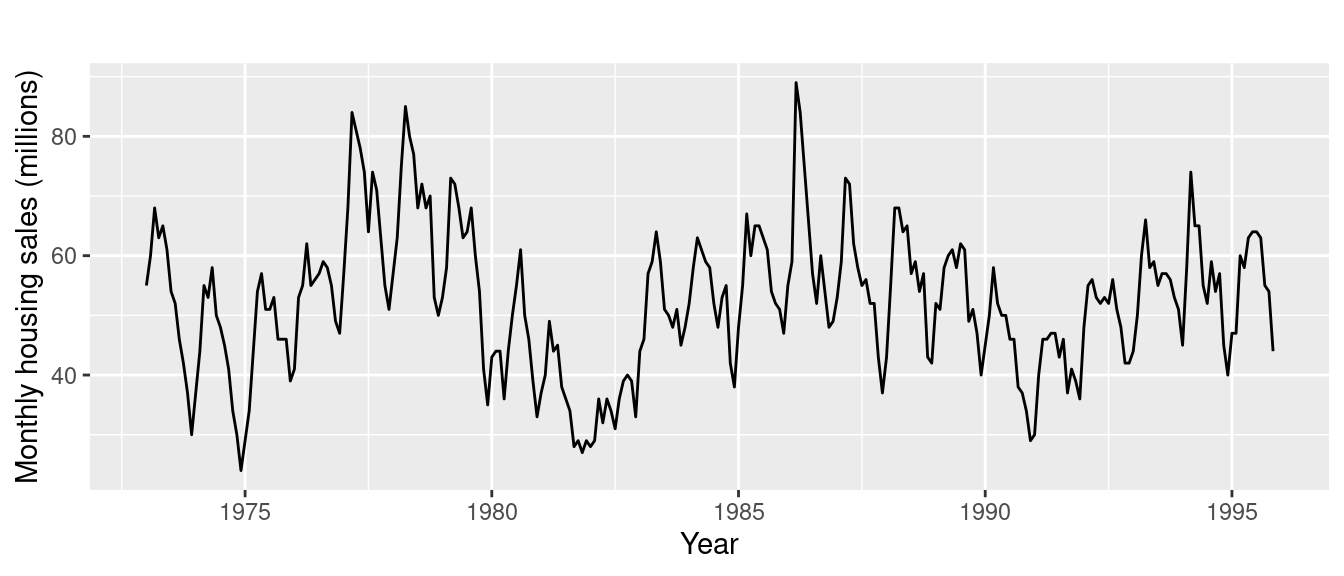

We can identify if a series is stationary or not by visual inspection, but a more mathematical method is to find the global mean and variance with local means and variance for different time periods, if there isn't a substantial difference then it is stationary.

There also exist other statistical tests to check stationarity of a series such as ADG Test and KPPS test.

**Methods of converting a non-stationary series to stationary**

**1) Differencing :** It is the method in which we subtract the original value with the value in the previous time instance. This helps convert the non-stationary series to stationary. 1st order differencing is when the value is subtracted by the exactly previous value. 2nd order is when the second last value is subtracted from the current value and so on.


**First order differencing :** Y( v ) new = Y( v ) - Y( v - 1 )

**Second order differencing :** Y( v ) new = Y( v ) - Y( v - 2 )

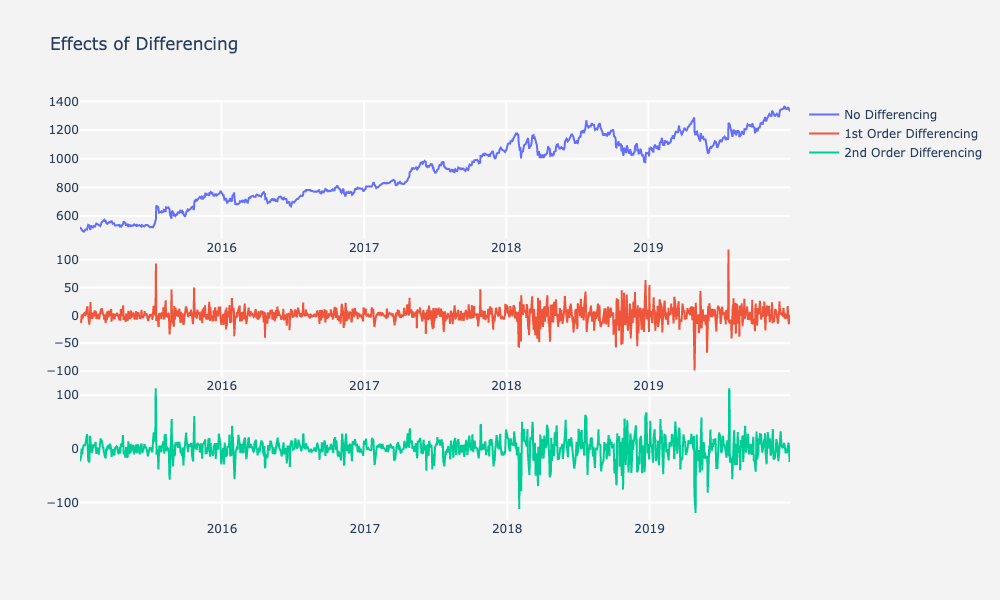

**2) Logarithmic smoothing :** It is an effective method for converting exponential series to stationary. It is basically finding the log of the original series.

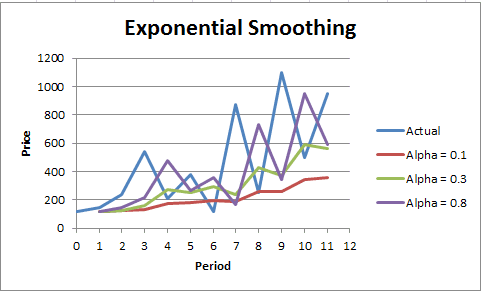

**3) Seasonal Differencing :** It is similar to differencing as seen before but the only difference is that instead of subtracting from a previous time instant we subtract from the previous time cycle the pattern is repeating. It is given by the formula

Y( v ) new = Y( v ) - Y( v - N )

where N is the time instant the same pattern occurred.

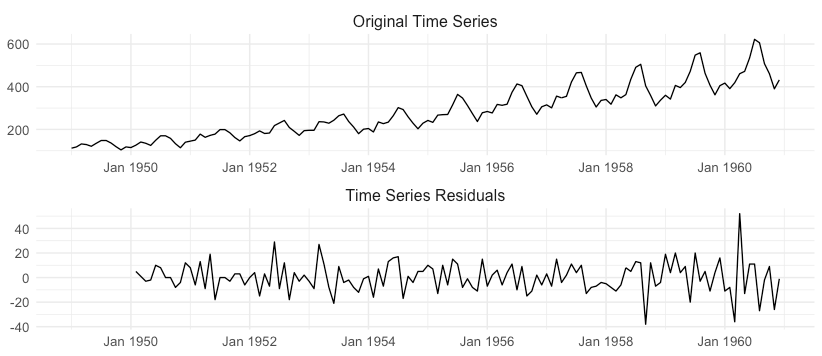

Eg :

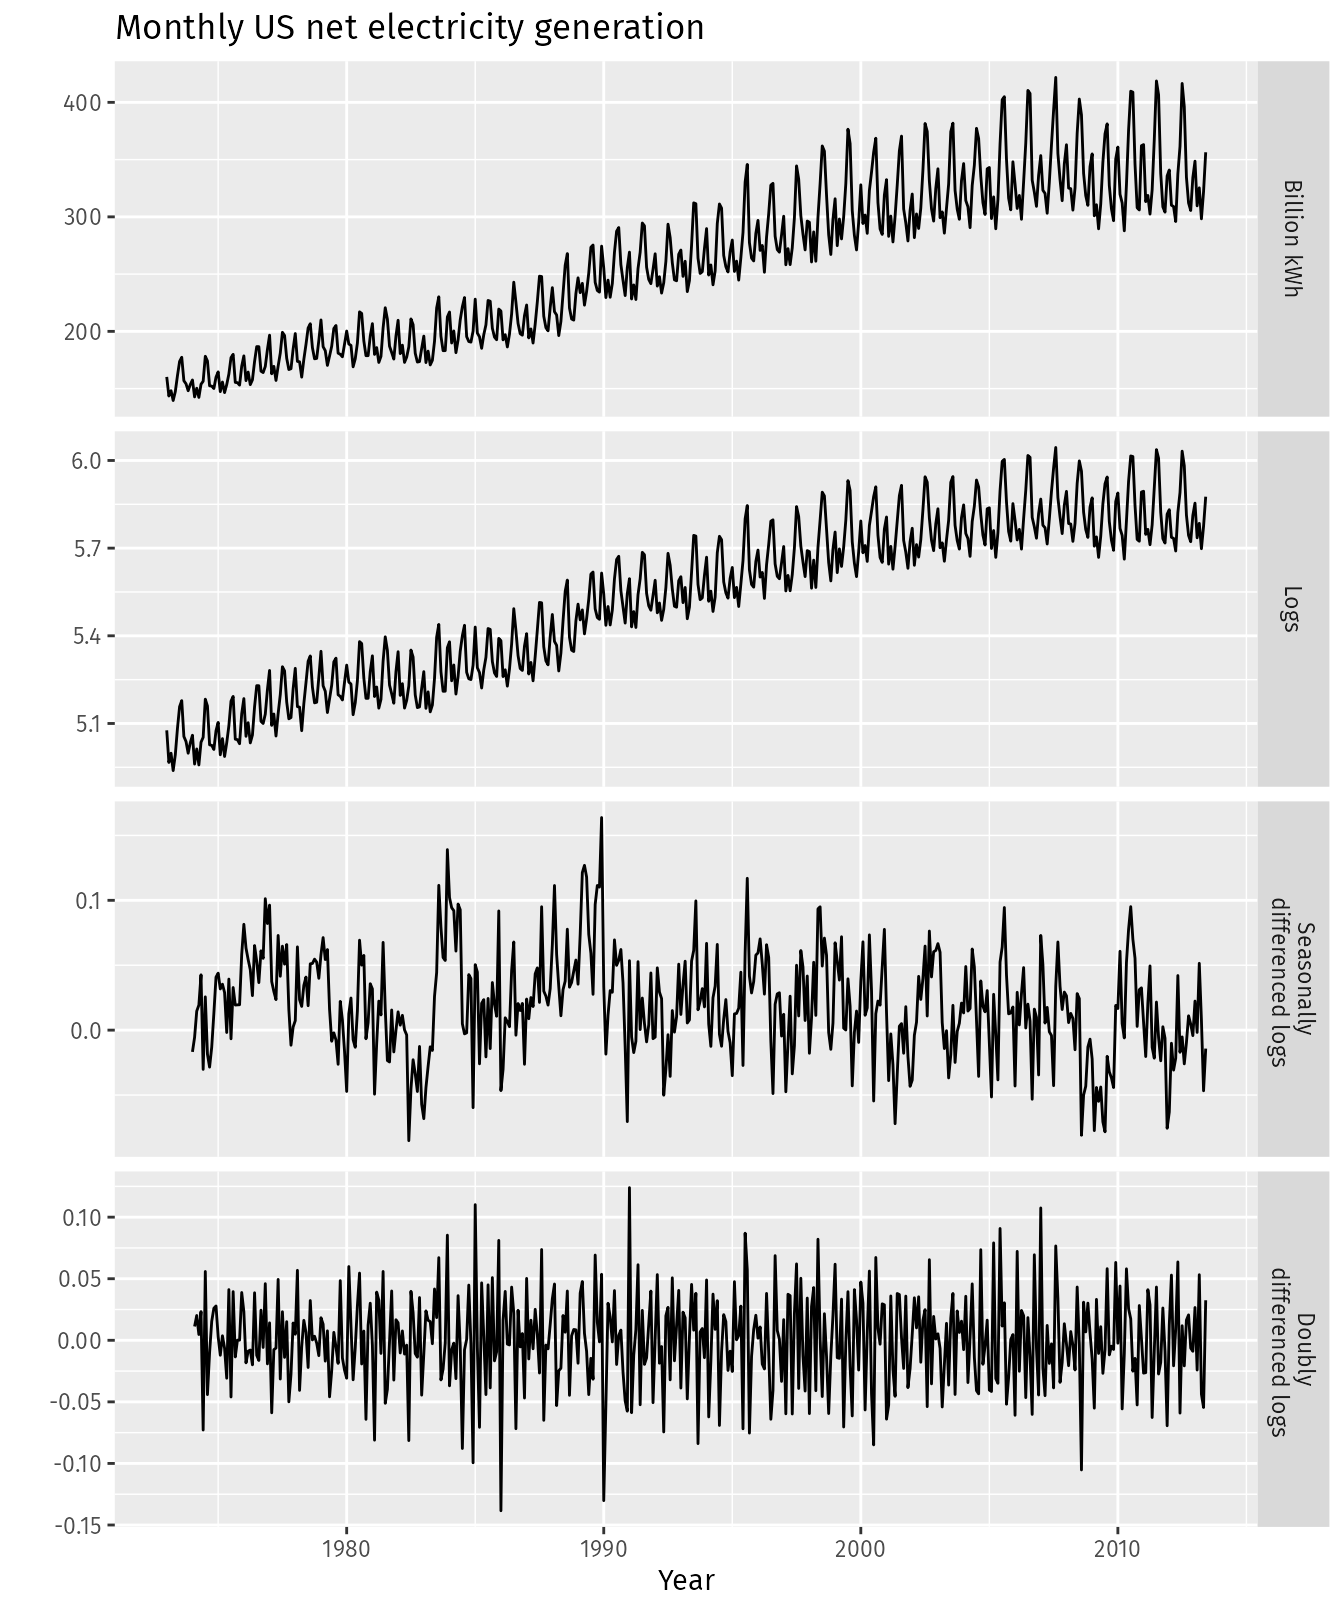

To predict the value at the next time instant we use auto regression. Regression is predicting a continuous value based on the different features affecting that value. Auto regression is predicting a continuous value based on its own previous values. The equation of the line is as follows :

Y ( t ) = c1 x Y ( t - 1 ) + c2 + error  (i.e. if only t-1 value affects the predicted value.)

Y ( t ) = c1 x Y ( t - 2 ) + c2 x Y ( t - 1 ) + c3 + error  (i.e. if both t-1 and t-2 values affect the predicted value.)

and so on.


We can determine the number of values affect the predicted value, using correlation functions.

$$
r = \frac{(\sum{xy}) - (\sum{x})(\sum{y})}{\sqrt{(\sum{x^2} - (\sum{x})^2)(\sum{y^2} - (\sum{y})^2)}}
$$

where n is the number of datapoints

There are two functions to determine whether the previous value affects the upcoming value or not.

ACF (Auto-Correlation Function) : It determines the effect of all the previous time instances simultaneously.

PACF (Partial Auto-Correlation Function) : It determines the effect of the previous time instances independently.

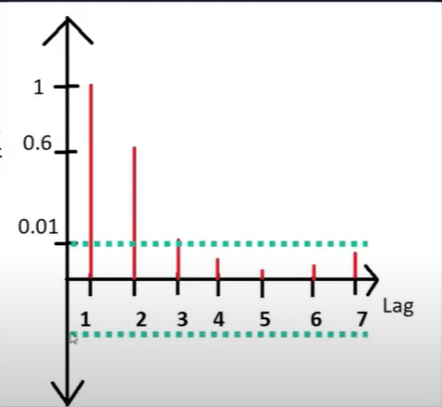

This is how PACF will determine if the time instant affects the predicted value. All the values that are above the error band (blue band) is said to have a considerable effect while those with lesser correlation can be neglected.


Y(t)= c0 + c1 x Y(t-1) + c2 x Y(t-2) + c3 x Y(t-3) + Error

Moving average models are used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles. They are particularly useful for forecasting and analyzing time series data. These model compute the average of the errors in previous predictions and uses that average to predict the next value.

We know that auto regressor uses the formula

Y ( t ) = c1 x ε ( t - 1 ) + c2 + εt + μ

where,

μ is the average of the series

The above is first order moving average model. We can have higher orders as well similar to the formulae in auto - regressor.

We make use of the auto-correlation function so as to determine the time instances that influence the prediction. Note, that for auto regressor model we use PACF and for moving average models we make use of ACF. The time instances which have a correlation higher than the error band (blue dotted line) will be considered while making predictions while the rest will be neglected.

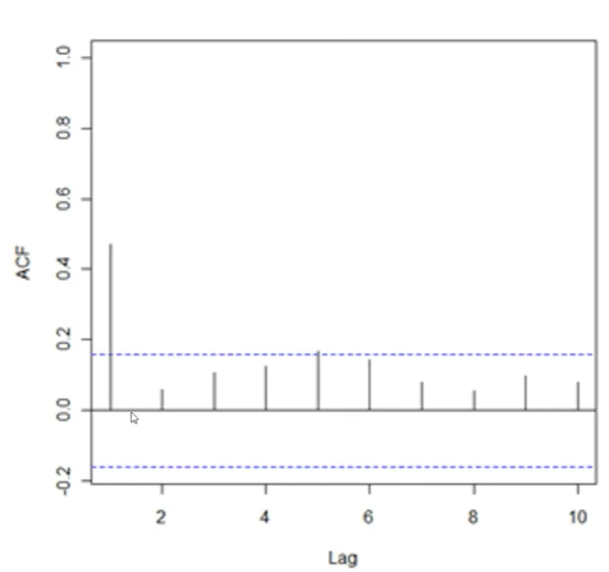

# ARMA (Auto-regression and moving average)

It is the model which makes use of both auto regression and moving average,

Equations for first order auto regression :

Y ( t ) = c1 x Y ( t - 1 ) + c2 + εt

Equation for first order moving average (Note the change in the coefficient for t-1 ) :

Y ( t ) = b1 x ε ( t - 1 ) + c2 + εt

Therefore, equation for ARMA will be :

Y ( t ) = c1 x Y ( t - 1 ) + b1 x ε ( t - 1 ) + c2 + εt  

This is said to be a (1,1) order ARMA equation (since first order auto regression and first order moving average equation)

# ARIMA model (Auto Regression Integrated Moving Average)

It is similar to ARMA model only difference is that the time series is first made stationary using the various methods and then auto regression and moving average are applied on it.

# Loading and Understanding the data

In [ ]:
!pip install yfinance

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

In [ ]:
symbol='AAPL' #This is the stock name
start_date='2020-07-01'
end_date='2024-07-01'

google_data=yf.download('GOOGL',start='2020-07-01',end='2024-07-01')
tesla_data=yf.download('TSLA',start='2020-07-01',end='2024-07-01')
apple_data=yf.download(symbol,start=start_date,end=end_date)
apple_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,91.279999,91.839996,90.977501,91.027496,88.898834,110737200
2020-07-02,91.962502,92.617500,90.910004,91.027496,88.898834,114041600
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.276901,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,90.993668,112424400
2020-07-08,94.180000,95.375000,94.089996,95.342499,93.112923,117092000


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2020-07-01 to 2024-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1005 non-null   float64
 1   High       1005 non-null   float64
 2   Low        1005 non-null   float64
 3   Close      1005 non-null   float64
 4   Adj Close  1005 non-null   float64
 5   Volume     1005 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


Notice how there is no column for Date, that is because Date is used in a way to index each row in the dataset.

To get the understanding of the columns in the dataset :

**Open :** It is the price of the stock at the start of the day.

**Close :** It is the price of the stock at the end of the day.

**Adj Close :** It is the adjusted closing price if there has been an split or dividend distribution with the shareholders.

**High :** It is the highest price the share went to on that day.

**Low :** It is the lowest price the share went to on that day.

**Volume :** It is the number of share that were traded (i.e. either bought or sold) on that day.

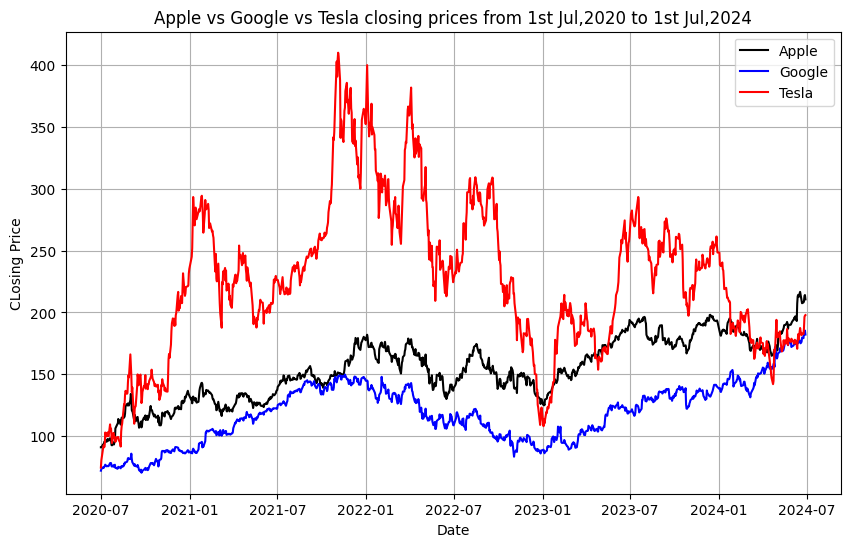

In [ ]:
plt.figure(figsize=(10,6))  #Sets the size of the plot
plt.plot(apple_data['Close'],color='black',label='Apple')
plt.plot(google_data['Close'],color='blue',label='Google')
plt.plot(tesla_data['Close'],color='red',label='Tesla')
plt.xlabel('Date')
plt.ylabel("CLosing Price")
plt.title("Apple vs Google vs Tesla closing prices from 1st Jul,2020 to 1st Jul,2024")
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Moving average
google_data['50_ma']=google_data['Close'].rolling(window=50).mean()
google_data['100_ma']=google_data['Close'].rolling(window=100).mean()
google_data['200_ma']=google_data['Close'].rolling(window=200).mean()

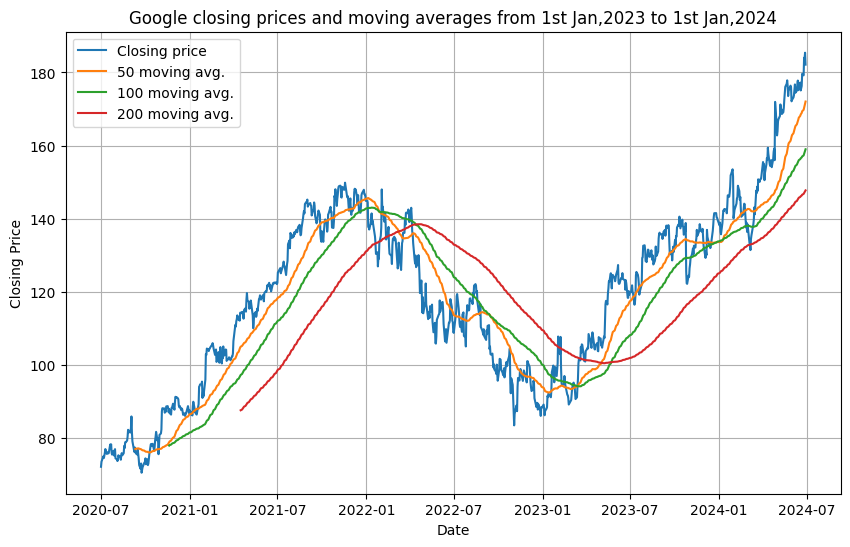

In [ ]:
plt.figure(figsize=(10,6))  #Sets the size of the plot
plt.plot(google_data['Close'],label='Closing price')
plt.plot(google_data['50_ma'],label='50 moving avg.')
plt.plot(google_data['100_ma'],label='100 moving avg.')
plt.plot(google_data['200_ma'],label='200 moving avg.')
plt.xlabel('Date')
plt.ylabel("Closing Price")
plt.title("Google closing prices and moving averages from 1st Jan,2023 to 1st Jan,2024")
plt.grid()
plt.legend()
plt.show()

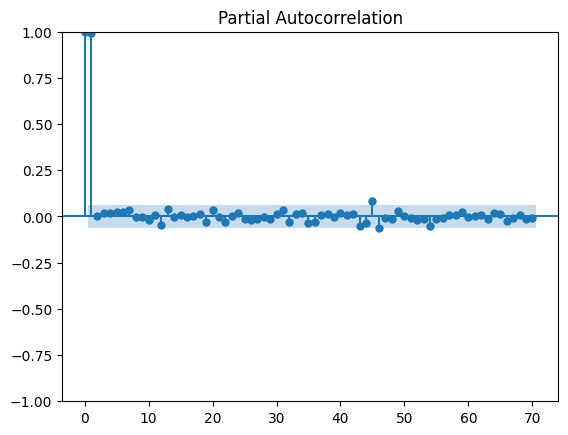

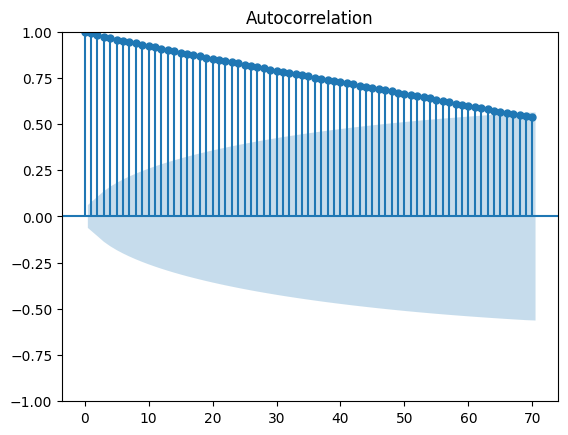

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf=plot_pacf(google_data['Close'],lags=70)
acf=plot_acf(google_data['Close'],lags=70)

Splitting the data into training and testing data

In [ ]:
#I wish to make the data of the last month as testing i split the following manner.

train=google_data['Close'][:len(google_data)-30]
test=google_data['Close'][len(google_data)-30:]

In [ ]:
train.head()

Date
2020-07-01    72.099998
2020-07-02    73.496498
2020-07-06    74.982498
2020-07-07    74.496002
2020-07-08    75.180000
Name: Close, dtype: float64

#Auto Regression Model

In [ ]:
model=AutoReg(train,lags=2).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                  975
Model:                     AutoReg(2)   Log Likelihood               -2182.530
Method:               Conditional MLE   S.D. of innovations              2.280
Date:                Tue, 30 Jul 2024   AIC                           4373.060
Time:                        10:41:11   BIC                           4392.582
Sample:                             2   HQIC                          4380.489
                                  975                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5262      0.381      1.382      0.167      -0.220       1.272
Close.L1       0.9588      0.032     29.918      0.000       0.896       1.022
Close.L2       0.0376      0.032      1.172      0.241      -0.025       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0035           +0.0000j            1.0035            0.0000
AR.2          -26.5070           +0.0000j           26.5070            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
pred=model.predict(start=len(train),end=len(google_data)-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
pred.index=test.index

print(pred)

Date
2024-05-16    172.334546
2024-05-17    172.247907
2024-05-20    172.158239
2024-05-21    172.069008
2024-05-22    171.980081
2024-05-23    171.891462
2024-05-24    171.803151
2024-05-28    171.715145
2024-05-29    171.627444
2024-05-30    171.540046
2024-05-31    171.452952
2024-06-03    171.366159
2024-06-04    171.279666
2024-06-05    171.193474
2024-06-06    171.107579
2024-06-07    171.021982
2024-06-10    170.936682
2024-06-11    170.851677
2024-06-12    170.766967
2024-06-13    170.682550
2024-06-14    170.598425
2024-06-17    170.514592
2024-06-18    170.431049
2024-06-20    170.347795
2024-06-21    170.264830
2024-06-24    170.182152
2024-06-25    170.099761
2024-06-26    170.017654
2024-06-27    169.935833
2024-06-28    169.854294
dtype: float64


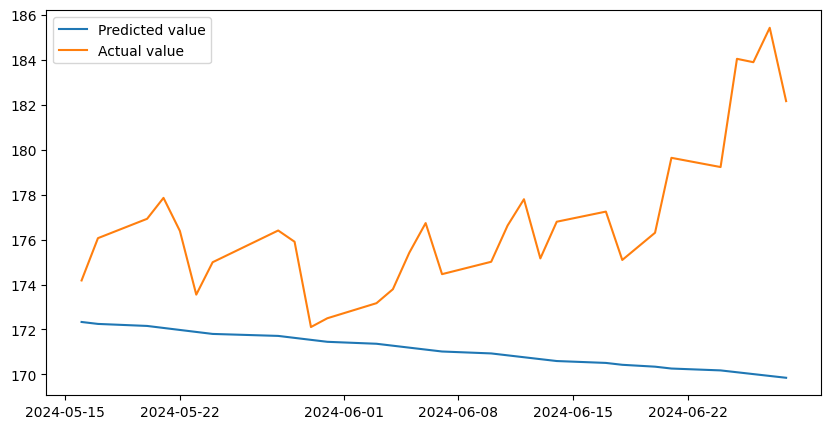

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred,label='Predicted value')
plt.plot(test,label='Actual value')
plt.legend()
plt.show()

In [ ]:
print(f"Mean absolute percent error : {np.mean(np.abs((test-pred)/test))*100}")

Mean absolute percent error : 3.2132545785827746


# Moving Average Model

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


model = sm.tsa.ARIMA(train, order=(0,3,10)).fit()  #0 is auto-regression order, 3 is differencing order and 5 is moving average order.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  975
Model:                ARIMA(0, 3, 10)   Log Likelihood               -2190.270
Date:                Tue, 30 Jul 2024   AIC                           4402.540
Time:                        15:25:01   BIC                           4456.212
Sample:                             0   HQIC                          4422.967
                                - 975                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.0320      0.028    -72.136      0.000      -2.087      -1.977
ma.L2          1.0537      0.062     16.962      0.000       0.932       1.175
ma.L3         -0.0555      0.074     -0.746      0.455      -0.201       0.090
ma.L4          0.0888      0.077      1.151      0.250      -0.062       0.240
ma.L5         -0.1089      0.077     -1.420      0.156      -0.259       0.041
ma.L6          0.0756      0.077      0.977      0.328      -0.076       0.227
ma.L7          0.0087      0.080      0.108      0.914      -0.149       0.166
ma.L8         -0.0390      0.076     -0.512      0.609      -0.188       0.110
ma.L9          0.0197      0.071      0.278      0.781      -0.119       0.158
ma.L10        -0.0108      0.033     -0.327      0.743      -0.075       0.054
sigma2         5.2169      0.137     38.148      0.000       4.949       5.485
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1012.43
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred=model.predict(start=len(train),end=len(google_data)-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pred.index=test.index

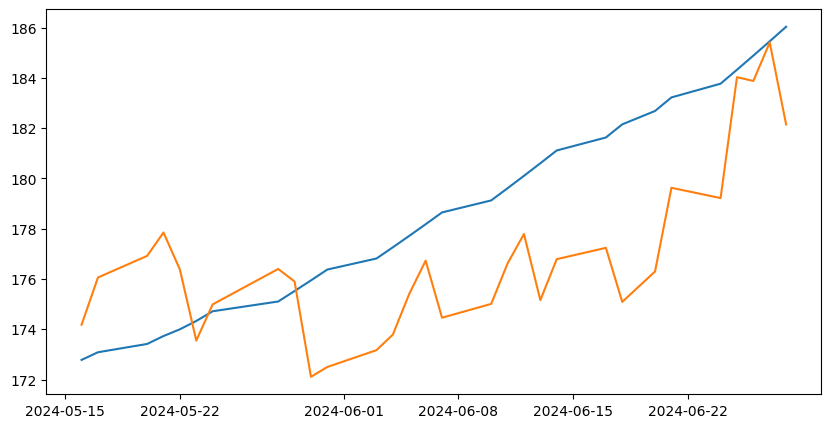

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred,label='Predicted value')
plt.plot(test,label='Actual value')
plt.show()

In [ ]:
print(f"Mean absolute percent error : {np.mean(np.abs((test-pred)/test))*100}")

Mean absolute percent error : 1.7086720727689328


# ARMA model

In [ ]:
model=sm.tsa.ARIMA(train, order=(2,0,50)).fit() #We keep the differencing order to 0, because that is what ARMA is and that is the differencing factor between ARMA and ARIMA.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  975
Model:                 ARIMA(7, 0, 7)   Log Likelihood               -2183.857
Date:                Tue, 30 Jul 2024   AIC                           4399.714
Time:                        14:27:13   BIC                           4477.833
Sample:                             0   HQIC                          4429.441
                                - 975                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.0439      0.004   2.74e+04      0.000     117.036     117.052
ar.L1         -0.8613      0.914     -0.942      0.346      -2.653       0.930
ar.L2         -0.6545      0.962     -0.680      0.496      -2.540       1.231
ar.L3         -0.4556      1.188     -0.383      0.701      -2.784       1.873
ar.L4          0.6281      0.948      0.662      0.508      -1.231       2.487
ar.L5          0.7049      0.987      0.715      0.475      -1.229       2.638
ar.L6          0.7573      1.069      0.709      0.479      -1.338       2.852
ar.L7          0.8809      0.990      0.890      0.374      -1.059       2.821
ma.L1          1.8353      0.913      2.011      0.044       0.047       3.624
ma.L2          2.4540      1.654      1.484      0.138      -0.787       5.695
ma.L3          2.8802      2.020      1.426      0.154      -1.079       6.839
ma.L4          2.2423      2.137      1.049      0.294      -1.946       6.430
ma.L5          1.5651      1.855      0.844      0.399      -2.071       5.202
ma.L6          0.8126      0.892      0.911      0.362      -0.935       2.560
ma.L7         -0.0253      0.049     -0.511      0.610      -0.122       0.072
sigma2         5.1258      0.153     33.445      0.000       4.825       5.426
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               873.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.73e+18. Standard errors may be unstable.
"""

In [ ]:
pred=model.predict(start=len(train),end=len(google_data)-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pred.index=test.index

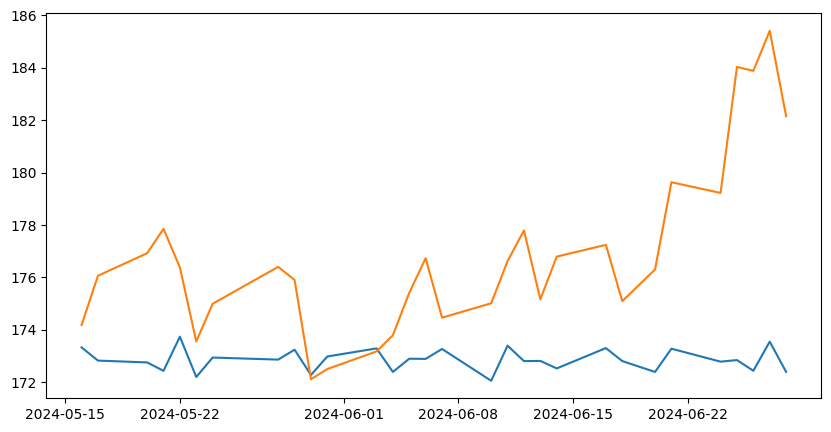

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred,label='Predicted value')
plt.plot(test,label='Actual value')
plt.show()

In [ ]:
print(f"Mean absolute percent error : {np.mean(np.abs((test-pred)/test))*100}")

Mean absolute percent error : 2.242304826486359


# ARIMA Model

In [ ]:
model=sm.tsa.ARIMA(train, order=(2,3,20)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  975
Model:                ARIMA(2, 3, 20)   Log Likelihood               -2178.049
Date:                Tue, 30 Jul 2024   AIC                           4402.097
Time:                        14:55:38   BIC                           4514.323
Sample:                             0   HQIC                          4444.809
                                - 975                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8807      0.004   -444.865      0.000      -1.889      -1.872
ar.L2         -0.9966      0.004   -222.906      0.000      -1.005      -0.988
ma.L1         -0.1526      0.029     -5.200      0.000      -0.210      -0.095
ma.L2         -1.7977      0.033    -53.782      0.000      -1.863      -1.732
ma.L3         -0.0959      0.061     -1.578      0.114      -0.215       0.023
ma.L4          1.0659      0.067     15.878      0.000       0.934       1.197
ma.L5         -0.0067      0.074     -0.091      0.928      -0.152       0.138
ma.L6         -0.0429      0.073     -0.584      0.559      -0.187       0.101
ma.L7          0.0450      0.076      0.593      0.553      -0.104       0.194
ma.L8          0.0468      0.075      0.621      0.535      -0.101       0.194
ma.L9          0.0013      0.076      0.018      0.986      -0.147       0.150
ma.L10        -0.0178      0.081     -0.219      0.826      -0.177       0.141
ma.L11        -0.0110      0.073     -0.150      0.881      -0.155       0.133
ma.L12        -0.0742      0.081     -0.919      0.358      -0.232       0.084
ma.L13        -0.0584      0.072     -0.805      0.421      -0.200       0.084
ma.L14         0.0680      0.082      0.832      0.405      -0.092       0.228
ma.L15        -0.0166      0.080     -0.209      0.835      -0.173       0.139
ma.L16         0.0019      0.085      0.022      0.983      -0.165       0.169
ma.L17         0.1599      0.074      2.168      0.030       0.015       0.304
ma.L18        -0.0067      0.074     -0.090      0.928      -0.152       0.139
ma.L19        -0.0976      0.036     -2.698      0.007      -0.168      -0.027
ma.L20        -0.0104      0.037     -0.284      0.776      -0.082       0.062
sigma2         5.0655      0.144     35.163      0.000       4.783       5.348
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1080.21
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred=model.predict(start=len(train),end=len(google_data)-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pred.index=test.index

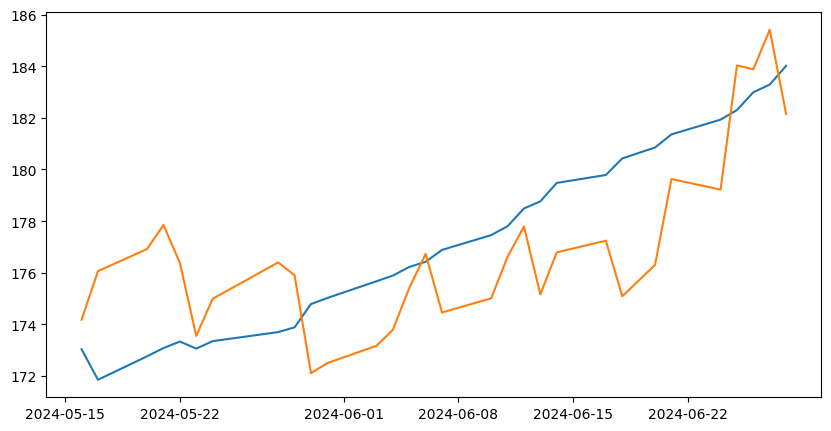

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred,label='Predicted value')
plt.plot(test,label='Actual value')
plt.show()

In [ ]:
print(f"Mean absolute percent error : {np.mean(np.abs((test-pred)/test))*100}")

Mean absolute percent error : 1.352017082809626


In [ ]:
ar_values=range(1,10)
ma_values=range(1,10)
diff_values=range(1,10)


for ar in ar_values:
  for diff in diff_values:
    for ma in ma_values:
      model=sm.tsa.ARIMA(train, order=(ar,diff,ma)).fit()
      pred=model.predict(start=len(train),end=len(google_data)-1)

      print(f"Auto Regression Order : {ar}\nDifferencing order : {diff}\nMoving Average order: {ma}\nMean absolute percent error : {np.mean(np.abs((test-pred)/test))*100}")